<a href="https://colab.research.google.com/github/esfandiaryfard/machine-learning/blob/main/FlowersClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import torch
import os
from torchvision.datasets import ImageFolder
import torchvision.transforms as T
from torch.utils.data import DataLoader
from torchvision.io import read_image
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm



# here we connect to drive

In [5]:
#we are connecting Google Drive and Google Colab
from google.colab import drive

In [6]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [256]:
# here we unzip the file !unzip path_to_file.zip -d path_to_directory


In [ ]:
!unzip "/content/drive/MyDrive/Work1/database/db_flowers/db_flowers.zip" -d "/content/drive/MyDrive/Work1/database/db_folder/"


Archive:  /content/drive/MyDrive/Work1/database/db_flowers/db_flowers.zip
replace /content/drive/MyDrive/Work1/database/db_folder/flowers/daisy/100080576_f52e8ee070_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/drive/MyDrive/Work1/database/db_folder/flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: /content/drive/MyDrive/Work1/database/db_folder/flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: /content/drive/MyDrive/Work1/database/db_folder/flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: /content/drive/MyDrive/Work1/database/db_folder/flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: /content/drive/MyDrive/Work1/database/db_folder/flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: /content/drive/MyDrive/Work1/database/db_folder/flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: /content/drive/MyDrive/Work1/database/db_folder/flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: /content/drive/MyDrive/Work1/database/db_fo

In [7]:
root_dir = "/content/drive/MyDrive/Work1/database/db_folder/flowers"
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


In [8]:
pip install split-folders


In [9]:
import splitfolders
input_folder = "/content/drive/MyDrive/Work1/database/db_folder/flowers/"


**we create a new folder with training, validation, test with a percentage of 0.7 /0.2 /0.1**





In [ ]:
splitfolders.ratio(input_folder, output='/content/drive/MyDrive/Work1/output_flower',seed= 123, ratio=(.7,.2,.1),group_prefix=None)

Copying files: 4317 files [17:43,  4.06 files/s]


In [10]:
dir= "/content/drive/MyDrive/Work1/output_flower/"  
drive.mount("/content/drive",force_remount=True)


Mounted at /content/drive


In [11]:
# Import Torch
import torch
# Setup device
dev = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(dev)

cpu


**apply some transformations**

In [12]:
from torchvision.transforms.transforms import Resize
from torchvision import transforms

# Compose transformations
data_transform = transforms.Compose([
  transforms.Resize(224),   # try to resize with 64 or less
  transforms.CenterCrop(224),
  transforms.RandomHorizontalFlip(),
  transforms.RandomVerticalFlip(),
  transforms.ToTensor(),
])


**now we split our dataset in  3 folders: train, validation and test**

In [13]:
# Instantiate datasets
train_set = ImageFolder(os.path.join(dir, "train"), transform=data_transform)  
val_set = ImageFolder(os.path.join(dir, "val"), transform=data_transform)
test_set = ImageFolder(os.path.join(dir, "test"), transform=data_transform)


In [14]:
# Get number of classes (we'll need it in the model)
num_classes = len(train_set.classes)
# Print dataset statistics
print(f"Num. classes: {num_classes}")
print(f"Classes:\n {train_set.classes}")
print(f"Num. train samples: {len(train_set)}")
print(f"Num. valid. samples: {len(val_set)}")
print(f"Num. test samples: {len(test_set)}")


Num. classes: 5
Classes:
 ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
Num. train samples: 3019
Num. valid. samples: 860
Num. test samples: 438


In [15]:
img_x, label_x = train_set[600]
print(img_x,label_x)



tensor([[[0.4902, 0.4902, 0.4902,  ..., 0.2784, 0.2784, 0.2745],
         [0.5020, 0.5020, 0.5020,  ..., 0.2784, 0.2745, 0.2706],
         [0.5020, 0.5020, 0.5059,  ..., 0.2824, 0.2784, 0.2745],
         ...,
         [0.4667, 0.4902, 0.5804,  ..., 0.3255, 0.3216, 0.3216],
         [0.4980, 0.5412, 0.7647,  ..., 0.3216, 0.3255, 0.3255],
         [0.5373, 0.7176, 0.9451,  ..., 0.3216, 0.3255, 0.3176]],

        [[0.7216, 0.7216, 0.7216,  ..., 0.5176, 0.5176, 0.5137],
         [0.7333, 0.7333, 0.7333,  ..., 0.5176, 0.5137, 0.5098],
         [0.7333, 0.7333, 0.7373,  ..., 0.5216, 0.5176, 0.5137],
         ...,
         [0.7098, 0.7098, 0.7608,  ..., 0.5686, 0.5647, 0.5647],
         [0.7255, 0.7020, 0.8627,  ..., 0.5647, 0.5686, 0.5686],
         [0.7176, 0.8039, 0.9765,  ..., 0.5647, 0.5686, 0.5725]],

        [[0.9412, 0.9412, 0.9412,  ..., 0.7333, 0.7333, 0.7294],
         [0.9529, 0.9529, 0.9529,  ..., 0.7333, 0.7294, 0.7255],
         [0.9529, 0.9529, 0.9569,  ..., 0.7373, 0.7333, 0.

In [16]:
train_set

Dataset ImageFolder
    Number of datapoints: 3019
    Root location: /content/drive/MyDrive/Work1/output_flower/train
    StandardTransform
Transform: Compose(
               Resize(size=224, interpolation=bilinear, max_size=None, antialias=None)
               CenterCrop(size=(224, 224))
               RandomHorizontalFlip(p=0.5)
               RandomVerticalFlip(p=0.5)
               ToTensor()
           )

**example of one of the images belong to the validation set**

In [19]:
#img = read_image("/content/output/val/astilbe/1033455028_f0c6518ec9_c.jpg")
#plt.imshow(img.permute(2, 1, 0))

def show_example(img, label):
    print('Label: ', train_set.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(2,1,0))

Label:  daisy (0)


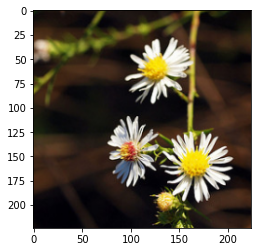

In [21]:
show_example(*val_set[100])  


**create a data loader instance with each dataset with a batch size of 32 and shuffling**


In [22]:
train_loader = DataLoader(train_set, batch_size=16, shuffle=True, drop_last=True, num_workers=2)
validation_loader = DataLoader(val_set, batch_size=16, shuffle=True, drop_last=False, num_workers=2)
test_loader = DataLoader(test_set, batch_size=16, shuffle=False, drop_last=False, num_workers=2)

#Notes:
# more is the number of workers, quicker will be with a saturage of the memory faster
#num_workers equal 0 means that it’s the main process that will do the data loading when needed
# num_workers equal 1 is the same as any n, but you’ll only have a single worker, so it might be slow



In [23]:
inputs, labels = next(iter(train_loader))
print(inputs.shape)   # the first value represents the value of the batch size
print(labels.shape)

torch.Size([16, 3, 224, 224])
torch.Size([16])


**Creating a CNN model**


The minimal layers we need for defining a CNN are:

Convolutional layer:

nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding, dilation)

Non-linear layer:

nn.ReLU()

Max pooling:

nn.MaxPool2d(kernel_size, stride)

In [53]:
import torch.nn as nn

class SimpleCNN(nn.Module):

  #Constructor
  def __init__(self):
    # Call parent contructor
    super().__init__()
    self.conv_layer = nn.Sequential(  #Sequential defines a block
        # Layer 1
        nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, padding=1, stride=2),
        nn.ReLU(),
        nn.BatchNorm2d(8),

        # # Layer 2
        nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.BatchNorm2d(16),
        nn.MaxPool2d(kernel_size=2, stride=2),

       

         # Layer 3
        nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.BatchNorm2d(32),
        nn.MaxPool2d(kernel_size=2, stride=2),

         #layer 4

        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.MaxPool2d(kernel_size=2, stride=2),

          #layer 5

        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.MaxPool2d(kernel_size=2, stride=2)

         #layer 6

        #nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=0, stride=1),
        #nn.ReLU(),
        #nn.BatchNorm2d(256),
       # nn.MaxPool2d(kernel_size=2, stride=2)

    )
  

# Forward
  def forward(self, x):
    x = self.conv_layer(x)
    return x




In [54]:
# Create the model
model = SimpleCNN()
print(model)

SimpleCNN(
  (conv_layer): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (8): ReLU()
    (9): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (12): ReLU()
    (13): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Conv2d(64, 128, kernel_siz

The main difficulty in choosing CNN parameters is to compute the size of the first fully-connected layer, which depends on the number of features maps and the size of each feature map at the last convolutional layer, which depend on the kernel sizes, padding, strides, dilations of all convolutional layers.

The simplest thing to do is to add the convolutional layers first, see the output size, and then add the fully-connected layers

In [55]:
# Get an element from the dataset
test_x, _ = test_set[0] # each element of the dataset is a couple (image, label)

In [56]:
# Get the size of a sample
test_x.size()

torch.Size([3, 224, 224])

Our 2D CNN model expects as input a tensor of shape: [N, C, H, W], where:

- N is the number of samples (batch_size);
- C is the number of channels (1 for grayscale images, 3 for RGB images);
- H and W are height and width dimension of the images;
We have to add the batch dimension to test_x

In [57]:
test_x = test_x.unsqueeze(dim=0) 
test_x.size()

torch.Size([1, 3, 224, 224])

In [58]:
output = model(test_x)
output.shape
output.size()

torch.Size([1, 128, 5, 5])

In [59]:
out_features = output.size(1) * output.size(2) * output.size(3)
print(out_features)

3200


Now we can add some fully connected layers to our CNN model

In [60]:
class CNN(nn.Module):
  #Constructor
  def __init__(self):
    # Call parent contructor
    super().__init__()
    self.conv_layer = nn.Sequential(
         # Layer 1
        nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, padding=1, stride=2),
        nn.ReLU(),
        nn.BatchNorm2d(8),

        # # Layer 2
        nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.BatchNorm2d(16),
        nn.MaxPool2d(kernel_size=2, stride=2),

       

        #  # Layer 3
        nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.BatchNorm2d(32),
        nn.MaxPool2d(kernel_size=2, stride=2),

        #  #layer 4

        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.MaxPool2d(kernel_size=2, stride=2),

         # layer 5

        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.MaxPool2d(kernel_size=2, stride=2)


        
  

    )
    # Create fully-connected layers
    self.fc_layers = nn.Sequential(
        # a first FC layer
        nn.Linear(3200, 4096),
        nn.ReLU(),
        nn.Linear(4096, 1024),
        nn.ReLU(),
        # the final Classification Layer
        nn.Linear(1024, 5)
    )

  # Forward
  def forward(self, x):
    x = self.conv_layer(x) # x has size: [B,256,4,4]; before passing to fc layer, we have to flatten x
    x = x.view(x.size(0), -1) # now x has size [B, 4096]
    output = self.fc_layers(x) # [B, 4096] --> [B, 1024] --> [B, 10]
    return output




In [61]:
# Create the model
model = CNN()
output = model(test_x)
output.shape

torch.Size([1, 5])

We can train our model faster using the GPU (when it is available)

In [62]:
torch.cuda.is_available()

False

In [63]:
# Define an optimizier
import torch.optim as optim
optimizer = optim.SGD(model.parameters(), lr = 0.01)  
# Define a loss 
criterion = nn.CrossEntropyLoss()

In [64]:
def train(net, loaders, optimizer, criterion, epochs=100, dev=torch.device('cpu')):
    try:
        net = net.to(dev)
        print(net)
        # Initialize history
        history_loss = {"train": [], "val": [], "test": []}
        history_accuracy = {"train": [], "val": [], "test": []}
        # Process each epoch
        for epoch in range(epochs):
            # Initialize epoch variables
            sum_loss = {"train": 0, "val": 0, "test": 0}
            sum_accuracy = {"train": 0, "val": 0, "test": 0}
            # Process each split
            for split in ["train", "val", "test"]:
                if split == "train":
                  net.train()
                else:




                  net.eval()
                # Process each batch
                for (input, labels) in tqdm(loaders[split],desc=split):
                    # Move to CUDA
                    input = input.to(dev)
                    labels = labels.to(dev)
                    # Reset gradients
                    optimizer.zero_grad()
                    # Compute output
                    pred = net(input)
                    loss = criterion(pred, labels)
                    # Update loss
                    sum_loss[split] += loss.item()
                    # Check parameter update
                    if split == "train":
                        # Compute gradients
                        loss.backward()
                        # Optimize
                        optimizer.step()
                    # Compute accuracy
                    _,pred_labels = pred.max(1)
                    batch_accuracy = (pred_labels == labels).sum().item()/input.size(0)
                    # Update accuracy
                    sum_accuracy[split] += batch_accuracy
            # Compute epoch loss/accuracy
            epoch_loss = {split: sum_loss[split]/len(loaders[split]) for split in ["train", "val", "test"]}
            epoch_accuracy = {split: sum_accuracy[split]/len(loaders[split]) for split in ["train", "val", "test"]}
            # Update history
            for split in ["train", "val", "test"]:
                history_loss[split].append(epoch_loss[split])
                history_accuracy[split].append(epoch_accuracy[split])
            # Print info
            print(f"Epoch {epoch+1}:",
                  f"TrL={epoch_loss['train']:.4f},",
                  f"TrA={epoch_accuracy['train']:.4f},",
                  f"VL={epoch_loss['val']:.4f},",
                  f"VA={epoch_accuracy['val']:.4f},",
                  f"TeL={epoch_loss['test']:.4f},",
                  f"TeA={epoch_accuracy['test']:.4f},")
    except KeyboardInterrupt:
        print("Interrupted")
    finally:
        # Plot loss
        plt.title("Loss")
        for split in ["train", "val", "test"]:
            plt.plot(history_loss[split], label=split)
        plt.legend()
        plt.show()
        # Plot accuracy
        plt.title("Accuracy")
        for split in ["train", "val", "test"]:
            plt.plot(history_accuracy[split], label=split)
        plt.legend()
        plt.show()





In [65]:
# Define dictionary of loaders
loaders = {"train": train_loader,   
           "val": validation_loader,
           "test": test_loader}

CNN(
  (conv_layer): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=100352, out_features=4096, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4096, out_features=1024, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1024, out_features=5, bias=True)
  )
)


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 1: TrL=1.2599, TrA=0.4721, VL=1.1622, VA=0.5143, TeL=1.2565, TeA=0.4583,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 2: TrL=1.1166, TrA=0.5322, VL=1.1271, VA=0.5424, TeL=1.1896, TeA=0.4784,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 3: TrL=1.0303, TrA=0.5874, VL=1.0463, VA=0.5783, TeL=1.0884, TeA=0.5491,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 4: TrL=0.9421, TrA=0.6340, VL=1.0585, VA=0.5752, TeL=1.0899, TeA=0.5499,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 5: TrL=0.8530, TrA=0.6792, VL=1.2765, VA=0.5235, TeL=1.3694, TeA=0.4501,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 6: TrL=0.7903, TrA=0.6991, VL=1.0690, VA=0.5853, TeL=1.1030, TeA=0.5670,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 7: TrL=0.6763, TrA=0.7483, VL=1.2476, VA=0.5193, TeL=1.3449, TeA=0.4896,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 8: TrL=0.6063, TrA=0.7846, VL=1.2032, VA=0.5440, TeL=1.2594, TeA=0.5521,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 9: TrL=0.5266, TrA=0.8039, VL=1.3407, VA=0.5602, TeL=1.4430, TeA=0.5454,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 10: TrL=0.4536, TrA=0.8408, VL=1.1597, VA=0.6003, TeL=1.3176, TeA=0.5454,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 11: TrL=0.3957, TrA=0.8624, VL=1.1399, VA=0.5961, TeL=1.2605, TeA=0.5342,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 12: TrL=0.3341, TrA=0.8890, VL=1.1529, VA=0.5883, TeL=1.2057, TeA=0.5469,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 13: TrL=0.2685, TrA=0.9096, VL=1.3696, VA=0.5741, TeL=1.2994, TeA=0.5439,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 14: TrL=0.2238, TrA=0.9222, VL=1.3343, VA=0.5679, TeL=1.4371, TeA=0.5409,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 15: TrL=0.2273, TrA=0.9235, VL=1.2822, VA=0.5976, TeL=1.3633, TeA=0.5439,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 16: TrL=0.1658, TrA=0.9498, VL=1.4929, VA=0.5829, TeL=1.5459, TeA=0.5320,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 17: TrL=0.1301, TrA=0.9621, VL=1.3840, VA=0.5914, TeL=1.5438, TeA=0.5558,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 18: TrL=0.1187, TrA=0.9621, VL=1.5451, VA=0.5691, TeL=1.6849, TeA=0.5424,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 19: TrL=0.0962, TrA=0.9691, VL=1.4828, VA=0.5887, TeL=1.6776, TeA=0.5722,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 20: TrL=0.0936, TrA=0.9731, VL=1.4213, VA=0.5972, TeL=1.5735, TeA=0.5454,


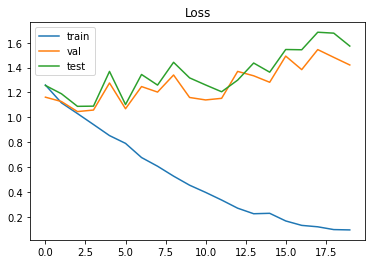

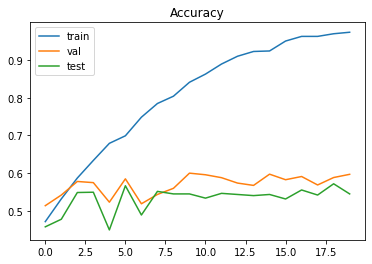

In [286]:
# Train model with 1 layer
train(model, loaders, optimizer, criterion, epochs=20, dev=dev)

CNN(
  (conv_layer): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=48400, out_features=4096, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4096, out_features=1024, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1024, out_features=5, bias=True)
  )
)


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 1: TrL=0.9667, TrA=0.6120, VL=1.0272, VA=0.5829, TeL=1.0724, TeA=0.5699,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 2: TrL=0.8855, TrA=0.6516, VL=1.0414, VA=0.5887, TeL=1.0529, TeA=0.5461,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 3: TrL=0.7648, TrA=0.7064, VL=1.0426, VA=0.5818, TeL=1.1162, TeA=0.5551,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 4: TrL=0.6795, TrA=0.7443, VL=1.2336, VA=0.5706, TeL=1.2960, TeA=0.5692,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 5: TrL=0.5731, TrA=0.7995, VL=1.0132, VA=0.6242, TeL=1.0111, TeA=0.6079,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 6: TrL=0.4753, TrA=0.8271, VL=1.0388, VA=0.6354, TeL=1.0239, TeA=0.6317,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 7: TrL=0.4015, TrA=0.8547, VL=0.9968, VA=0.6478, TeL=1.0132, TeA=0.6228,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 8: TrL=0.3512, TrA=0.8777, VL=1.1066, VA=0.6235, TeL=1.1282, TeA=0.6280,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 9: TrL=0.2733, TrA=0.9146, VL=1.0772, VA=0.6593, TeL=1.0745, TeA=0.6250,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 10: TrL=0.2477, TrA=0.9225, VL=1.1510, VA=0.6339, TeL=1.1771, TeA=0.6376,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 11: TrL=0.1963, TrA=0.9318, VL=1.1903, VA=0.6454, TeL=1.3615, TeA=0.6101,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 12: TrL=0.1778, TrA=0.9451, VL=1.1520, VA=0.6524, TeL=1.2099, TeA=0.6302,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 13: TrL=0.1443, TrA=0.9525, VL=1.1286, VA=0.6748, TeL=1.2867, TeA=0.6213,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 14: TrL=0.1098, TrA=0.9684, VL=1.1947, VA=0.6651, TeL=1.2888, TeA=0.6287,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 15: TrL=0.0959, TrA=0.9711, VL=1.2556, VA=0.6586, TeL=1.3363, TeA=0.6257,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 16: TrL=0.0800, TrA=0.9767, VL=1.2458, VA=0.6644, TeL=1.3174, TeA=0.6257,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 17: TrL=0.0606, TrA=0.9834, VL=1.3447, VA=0.6485, TeL=1.3429, TeA=0.6399,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 18: TrL=0.0635, TrA=0.9820, VL=1.2958, VA=0.6535, TeL=1.3822, TeA=0.6161,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 19: TrL=0.0427, TrA=0.9890, VL=1.2969, VA=0.6578, TeL=1.4505, TeA=0.6384,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 20: TrL=0.0381, TrA=0.9924, VL=1.3022, VA=0.6605, TeL=1.4785, TeA=0.6146,


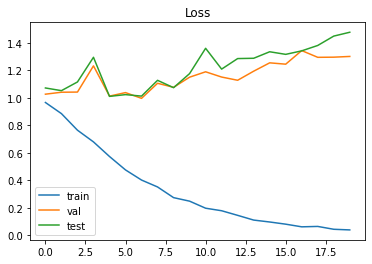

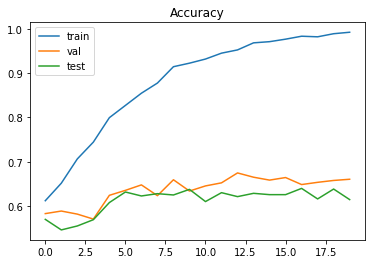

In [357]:
# Train model with 2 layers
train(model, loaders, optimizer, criterion, epochs=20, dev=dev)

CNN(
  (conv_layer): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (8): ReLU()
    (9): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=21632, out_features=4096, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4096, out_features=1024, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1024, out_features=5, bias=True)
  )
)


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 1: TrL=1.2427, TrA=0.4664, VL=1.2697, VA=0.4379, TeL=1.3315, TeA=0.4040,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 2: TrL=1.0461, TrA=0.5745, VL=1.0202, VA=0.5694, TeL=1.0486, TeA=0.5640,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 3: TrL=0.9490, TrA=0.6217, VL=1.0017, VA=0.6130, TeL=1.0459, TeA=0.5722,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 4: TrL=0.8585, TrA=0.6659, VL=1.0218, VA=0.6003, TeL=1.0636, TeA=0.5640,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 5: TrL=0.7734, TrA=0.7081, VL=1.1471, VA=0.5671, TeL=1.2304, TeA=0.5327,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 6: TrL=0.7103, TrA=0.7327, VL=0.9794, VA=0.6242, TeL=1.0226, TeA=0.6094,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 7: TrL=0.6398, TrA=0.7656, VL=1.0220, VA=0.6227, TeL=1.0829, TeA=0.5722,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 8: TrL=0.5776, TrA=0.7773, VL=1.0220, VA=0.6346, TeL=1.0999, TeA=0.5811,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 9: TrL=0.4804, TrA=0.8291, VL=0.8695, VA=0.6929, TeL=0.9420, TeA=0.6347,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 10: TrL=0.4660, TrA=0.8358, VL=0.9694, VA=0.6613, TeL=1.0592, TeA=0.6235,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 11: TrL=0.3735, TrA=0.8693, VL=0.9781, VA=0.6887, TeL=0.9598, TeA=0.6629,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 12: TrL=0.3177, TrA=0.8883, VL=1.0261, VA=0.6686, TeL=1.0601, TeA=0.6295,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 13: TrL=0.3080, TrA=0.8956, VL=1.1355, VA=0.6532, TeL=1.1977, TeA=0.5923,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 14: TrL=0.2332, TrA=0.9232, VL=0.9768, VA=0.6782, TeL=1.0260, TeA=0.6473,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 15: TrL=0.2192, TrA=0.9299, VL=1.2642, VA=0.6497, TeL=1.3934, TeA=0.6101,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 16: TrL=0.1865, TrA=0.9398, VL=1.3237, VA=0.6173, TeL=1.3214, TeA=0.6176,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 17: TrL=0.1408, TrA=0.9571, VL=1.0245, VA=0.6933, TeL=1.1214, TeA=0.6622,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 18: TrL=0.1336, TrA=0.9555, VL=1.1829, VA=0.6586, TeL=1.3846, TeA=0.6272,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 19: TrL=0.1229, TrA=0.9651, VL=1.3246, VA=0.6208, TeL=1.4794, TeA=0.5982,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 20: TrL=0.0882, TrA=0.9727, VL=1.1773, VA=0.6933, TeL=1.2847, TeA=0.6317,


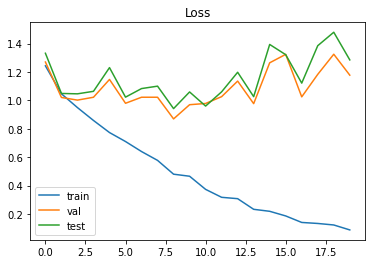

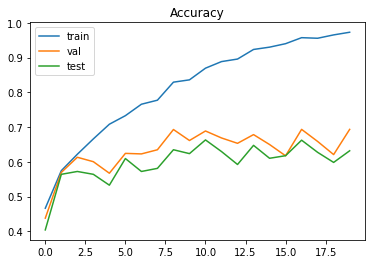

In [37]:
# Train model with 3 layers
train(model, loaders, optimizer, criterion, epochs=20, dev=dev)

CNN(
  (conv_layer): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (8): ReLU()
    (9): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (12): ReLU()
    (13): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Li

train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 1: TrL=1.1826, TrA=0.5037, VL=1.0290, VA=0.5926, TeL=1.0643, TeA=0.5603,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 2: TrL=1.0112, TrA=0.5931, VL=1.0253, VA=0.5768, TeL=1.1109, TeA=0.5179,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 3: TrL=0.9225, TrA=0.6413, VL=0.9339, VA=0.6370, TeL=1.0271, TeA=0.6146,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 4: TrL=0.8582, TrA=0.6612, VL=0.8856, VA=0.6617, TeL=0.9707, TeA=0.6429,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 5: TrL=0.7931, TrA=0.6838, VL=1.0168, VA=0.6053, TeL=1.0166, TeA=0.5714,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 6: TrL=0.7236, TrA=0.7214, VL=1.0354, VA=0.6304, TeL=1.0438, TeA=0.6027,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 7: TrL=0.7081, TrA=0.7314, VL=0.8553, VA=0.6659, TeL=0.9993, TeA=0.6079,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 8: TrL=0.6496, TrA=0.7560, VL=0.9382, VA=0.6698, TeL=0.9672, TeA=0.6324,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 9: TrL=0.6132, TrA=0.7670, VL=0.8621, VA=0.6906, TeL=0.9471, TeA=0.6518,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 10: TrL=0.5415, TrA=0.7999, VL=0.7606, VA=0.7172, TeL=0.8230, TeA=0.6927,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 11: TrL=0.5143, TrA=0.8062, VL=0.7418, VA=0.7157, TeL=0.7998, TeA=0.7009,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 12: TrL=0.4294, TrA=0.8404, VL=0.9280, VA=0.6767, TeL=1.0397, TeA=0.6339,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 13: TrL=0.3997, TrA=0.8567, VL=0.8869, VA=0.6898, TeL=0.9624, TeA=0.6473,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 14: TrL=0.3643, TrA=0.8677, VL=0.9283, VA=0.6979, TeL=0.9869, TeA=0.6726,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 15: TrL=0.3305, TrA=0.8876, VL=0.8544, VA=0.7168, TeL=0.8714, TeA=0.6815,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 16: TrL=0.3090, TrA=0.8959, VL=0.8718, VA=0.6952, TeL=0.9442, TeA=0.6399,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 17: TrL=0.2561, TrA=0.9102, VL=0.8274, VA=0.7095, TeL=0.8561, TeA=0.6987,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 18: TrL=0.2494, TrA=0.9152, VL=0.8552, VA=0.7253, TeL=0.9149, TeA=0.6778,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 19: TrL=0.1900, TrA=0.9378, VL=0.8717, VA=0.7257, TeL=1.0485, TeA=0.6711,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 20: TrL=0.1780, TrA=0.9455, VL=0.8622, VA=0.7311, TeL=0.9713, TeA=0.6942,


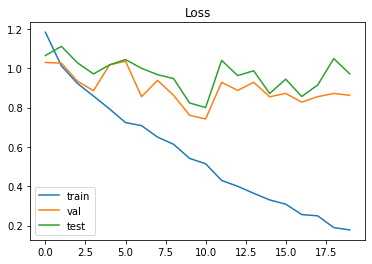

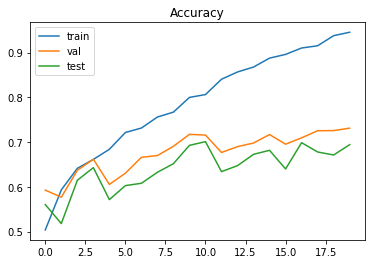

In [52]:
# Train model with 4 layers
train(model, loaders, optimizer, criterion, epochs=20, dev=dev)

CNN(
  (conv_layer): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (8): ReLU()
    (9): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (12): ReLU()
    (13): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Conv2d(64, 128, kernel_size=(3, 

train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 1: TrL=1.1796, TrA=0.5017, VL=1.1095, VA=0.5525, TeL=1.1001, TeA=0.5536,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 2: TrL=0.9882, TrA=0.6031, VL=1.0369, VA=0.6111, TeL=1.0895, TeA=0.5580,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 3: TrL=0.8818, TrA=0.6479, VL=1.2125, VA=0.5397, TeL=1.2920, TeA=0.5007,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 4: TrL=0.8264, TrA=0.6795, VL=0.9470, VA=0.6512, TeL=1.0723, TeA=0.5967,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 5: TrL=0.7780, TrA=0.7018, VL=0.7860, VA=0.7118, TeL=0.8349, TeA=0.6935,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 6: TrL=0.7142, TrA=0.7204, VL=0.7695, VA=0.7056, TeL=0.8208, TeA=0.6644,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 7: TrL=0.6979, TrA=0.7350, VL=0.9149, VA=0.6651, TeL=0.9474, TeA=0.6577,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 8: TrL=0.6544, TrA=0.7507, VL=0.7884, VA=0.7218, TeL=0.8383, TeA=0.6942,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 9: TrL=0.6398, TrA=0.7603, VL=0.7658, VA=0.7330, TeL=0.8042, TeA=0.7098,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 10: TrL=0.6055, TrA=0.7680, VL=0.8320, VA=0.7103, TeL=0.8405, TeA=0.6882,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 11: TrL=0.5636, TrA=0.7799, VL=0.8480, VA=0.6898, TeL=0.8553, TeA=0.6778,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 12: TrL=0.5485, TrA=0.7972, VL=0.7368, VA=0.7284, TeL=0.7827, TeA=0.7202,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 13: TrL=0.5189, TrA=0.7962, VL=0.6741, VA=0.7531, TeL=0.7945, TeA=0.6875,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 14: TrL=0.4830, TrA=0.8235, VL=0.7246, VA=0.7114, TeL=0.8286, TeA=0.6868,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 15: TrL=0.4713, TrA=0.8268, VL=0.7534, VA=0.7350, TeL=0.7559, TeA=0.7165,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 16: TrL=0.4269, TrA=0.8524, VL=0.6979, VA=0.7446, TeL=0.7603, TeA=0.7076,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 17: TrL=0.4041, TrA=0.8534, VL=0.7467, VA=0.7350, TeL=0.8102, TeA=0.7091,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 18: TrL=0.4026, TrA=0.8544, VL=0.6858, VA=0.7662, TeL=0.7307, TeA=0.7314,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 19: TrL=0.3506, TrA=0.8664, VL=0.7488, VA=0.7500, TeL=0.7972, TeA=0.7232,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 20: TrL=0.3386, TrA=0.8777, VL=0.8140, VA=0.7230, TeL=0.9633, TeA=0.6875,


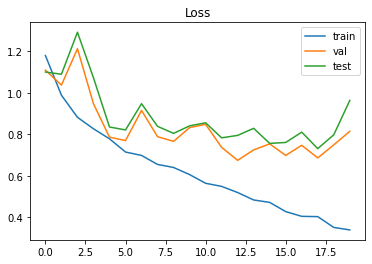

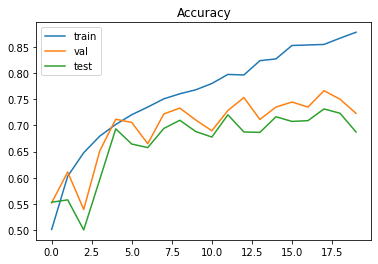

In [66]:
# Train model with 5 layers 
train(model, loaders, optimizer, criterion, epochs=20, dev=dev)

CNN(
  (conv_layer): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (8): ReLU()
    (9): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (12): ReLU()
    (13): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Conv2d(64, 128, kernel_size=(3, 

train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 1: TrL=0.7192, TrA=0.7204, VL=0.8271, VA=0.7176, TeL=0.9244, TeA=0.6741,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 2: TrL=0.7062, TrA=0.7274, VL=0.8156, VA=0.6975, TeL=0.9138, TeA=0.6429,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 3: TrL=0.6718, TrA=0.7467, VL=0.8479, VA=0.6906, TeL=0.8699, TeA=0.6875,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 4: TrL=0.6596, TrA=0.7424, VL=0.8884, VA=0.6910, TeL=0.9575, TeA=0.6629,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 5: TrL=0.6451, TrA=0.7586, VL=0.7729, VA=0.7068, TeL=0.9326, TeA=0.6667,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 6: TrL=0.6337, TrA=0.7623, VL=0.7617, VA=0.7245, TeL=0.8270, TeA=0.6897,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 7: TrL=0.6098, TrA=0.7633, VL=0.7574, VA=0.7230, TeL=0.8224, TeA=0.7068,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 8: TrL=0.5905, TrA=0.7769, VL=0.7818, VA=0.7130, TeL=0.8894, TeA=0.6905,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 9: TrL=0.5841, TrA=0.7773, VL=0.7606, VA=0.7280, TeL=0.8037, TeA=0.6682,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 10: TrL=0.5677, TrA=0.7809, VL=0.9211, VA=0.6914, TeL=1.0130, TeA=0.6510,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 11: TrL=0.5413, TrA=0.7906, VL=0.8352, VA=0.7068, TeL=0.8896, TeA=0.6942,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 12: TrL=0.4954, TrA=0.8055, VL=0.8224, VA=0.7157, TeL=1.0305, TeA=0.6652,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 13: TrL=0.5128, TrA=0.8005, VL=0.8566, VA=0.6948, TeL=0.9535, TeA=0.6481,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 14: TrL=0.5194, TrA=0.8085, VL=0.9150, VA=0.7145, TeL=0.8976, TeA=0.6711,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 15: TrL=0.4772, TrA=0.8201, VL=0.9190, VA=0.6902, TeL=1.0088, TeA=0.6629,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 16: TrL=0.4792, TrA=0.8152, VL=0.8182, VA=0.7164, TeL=0.8374, TeA=0.6979,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 17: TrL=0.4744, TrA=0.8251, VL=0.7946, VA=0.7469, TeL=0.8406, TeA=0.7046,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 18: TrL=0.4373, TrA=0.8321, VL=0.8024, VA=0.7357, TeL=0.9144, TeA=0.7091,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 19: TrL=0.4166, TrA=0.8434, VL=0.8390, VA=0.7276, TeL=0.9903, TeA=0.7046,


train:   0%|          | 0/188 [00:00<?, ?it/s]

val:   0%|          | 0/54 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 20: TrL=0.4236, TrA=0.8461, VL=0.9015, VA=0.6971, TeL=0.9586, TeA=0.6615,


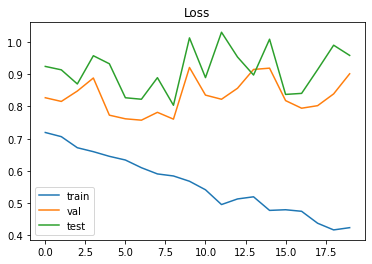

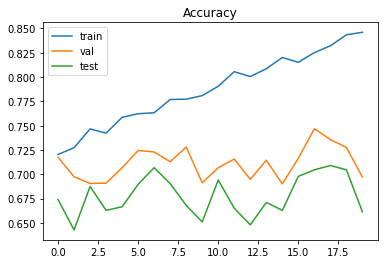

In [ ]:
# Train model with  layers 5 bis 
train(model, loaders, optimizer, criterion, epochs=20, dev=dev)

In [67]:
#helper function to visualize the data in numpy
def im_convert(tensor):
    image = tensor.numpy()
    image = image.transpose(1, 2, 0)
    image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
    return image




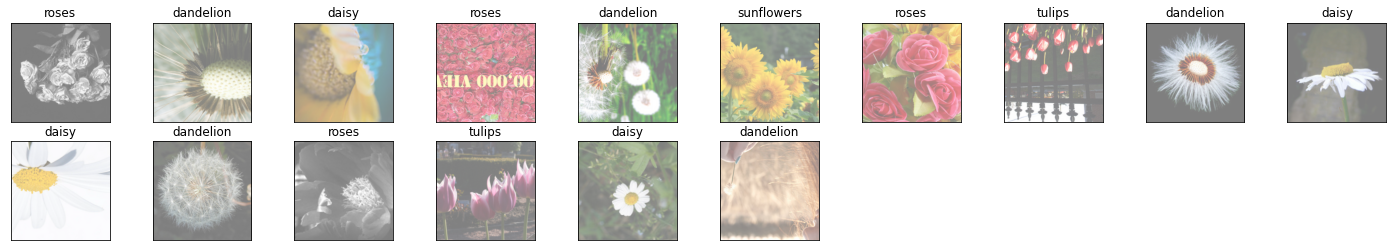

In [68]:
# transform the images in numpy and see some sample images
import numpy as np

classes = ('daisy', 'dandelion', 'roses', 'sunflowers', 'tulips')

dataiter = iter(validation_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(16):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    plt.imshow(im_convert(images[idx]))
    ax.set_title(classes[labels[idx].item()])

In [71]:
#Predicting the Category for all Test Images
# Confusion_matrix

total_correct = 0
total_images = 0
confusion_matrix1 = np.zeros([5,5], int)
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images = images.to(dev)
        labels = labels.to(dev)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()
        for i, l in enumerate(labels):
            confusion_matrix1[l.item(), predicted[i].item()] += 1 
model_accuracy = total_correct / total_images * 100
print('total images correct {0} on {1} total images with an accuracy of : {2:.2f}%'.format(total_correct,total_images, model_accuracy))
print ()


total images correct 310 on 438 total images with an accuracy of : 70.78%



In [74]:
#class_wise accuracy
print('{0:5s} : {1}'.format('Category','Accuracy'))
for i, r in enumerate(confusion_matrix1):
    print('{0:5s} : {1:.1f}'.format(classes[i], r[i]/np.sum(r)*100))
    

Category : Accuracy
daisy : 51.3
dandelion : 80.2
roses : 71.2
sunflowers : 78.4
tulips : 70.0


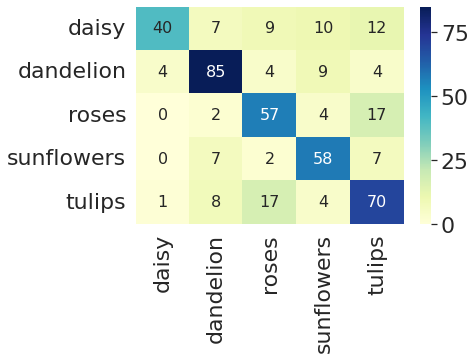

In [75]:
import pandas as pd
import seaborn as sn
df1  = pd.DataFrame(confusion_matrix1,classes,classes)
sn.set(font_scale=2) # for label size
sn.heatmap(df1, annot=True, annot_kws={"size": 16}, cmap ="YlGnBu") # font size

plt.show()

In [76]:
def predict_image(img, model):
    # Get predictions from model
    img = (img.unsqueeze(dim=0)).to(dev)
    yb = model(img)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return train_set.classes[preds[0].item()]

Label: sunflower , Predicted: dandelion


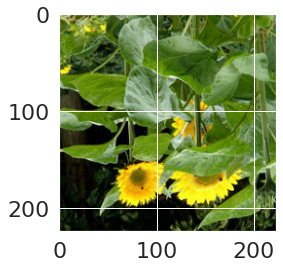

In [77]:
img, label = test_set[300]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_set.classes[label], ', Predicted:', predict_image(img, model))

Label: dandelion , Predicted: dandelion


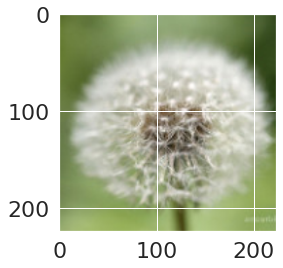

In [78]:
img, label = test_set[130]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_set.classes[label], ', Predicted:', predict_image(img, model))